# **Movie Reception Prediction with LDA**
# ------------------------------------------------------
# Topic Modeling-Part 1

In [5]:
import pandas as pd
import pickle

In [8]:
import gensim
from gensim.corpora import Dictionary

In [6]:
reviews = pd.read_pickle('pickled/processed_reviews.pkl')
reviews.head()

0    [review, mention, watch, hook, right, exact, h...
1    [wonder, littl, product, film, techniqu, unass...
2    [think, wonder, spend, time, summer, weekend, ...
3    [basic, famili, littl, jake, think, zombi, clo...
4    [petter, mattei, love, time, money, visual, st...
Name: review, dtype: object

In [9]:
#Create ID2WORD
review_id2word = Dictionary(reviews)

In [10]:
pickle.dump(review_id2word, open('pickled/review_id2word.pkl', 'wb'))

In [7]:
count = 0

for k, v in review_id2word.iteritems():
    print(k, v)
    count +=1
    if count>10:
        break

0 accustom
1 agenda
2 agreement
3 appeal
4 around
5 aryan
6 audienc
7 away
8 becom
9 bitch
10 brutal


In [11]:
#Create Corpus BoW
corpus_BoW = [review_id2word.doc2bow(review) for review in reviews]

In [12]:
pickle.dump(corpus_BoW, open('pickled/corpus_BoW.pkl', 'wb'))

In [9]:
#Test that BoW Conversion Worked as Expected
sample_BoW =corpus_BoW[1100]
sample_BoW

[(33, 1), (40, 1), (62, 1), (85, 1), (114, 2), (115, 1), (117, 1), (154, 1), (184, 1), (190, 1), (192, 1), (195, 1), (206, 2), (249, 2), (252, 2), (283, 1), (287, 2), (292, 1), (325, 1), (343, 1), (376, 1), (397, 3), (423, 1), (429, 1), (437, 1), (455, 1), (462, 1), (547, 1), (573, 2), (604, 1), (650, 5), (682, 3), (742, 1), (744, 1), (758, 1), (806, 1), (838, 1), (964, 1), (993, 1), (996, 3), (1072, 1), (1077, 1), (1147, 1), (1219, 1), (1285, 1), (1319, 1), (1333, 1), (1417, 1), (1522, 1), (1644, 1), (1671, 1), (1678, 1), (1724, 1), (1770, 1), (1831, 2), (1899, 1), (2293, 1), (2318, 1), (2702, 1), (2898, 1), (2927, 1), (3154, 4), (3171, 2), (3740, 1), (3955, 1), (4126, 2), (4574, 1), (4575, 1), (5318, 1), (5359, 1), (5522, 1), (7049, 1), (7696, 1), (7703, 1), (7705, 1), (11564, 1), (11837, 1), (12064, 1), (12065, 1), (12066, 1), (12067, 1)]

In [10]:
for i in range(len(sample_BoW)):
    print("Word {} (\"{}\") appears {} time.".format(sample_BoW[i][0], 
                                                     review_id2word[sample_BoW[i][0]], 
                                                     sample_BoW[i][1]))

Word 33 ("fact") appears 1 time.
Word 40 ("give") appears 1 time.
Word 62 ("mani") appears 1 time.
Word 85 ("review") appears 1 time.
Word 114 ("watch") appears 2 time.
Word 115 ("well") appears 1 time.
Word 117 ("would") appears 1 time.
Word 154 ("rather") appears 1 time.
Word 184 ("charact") appears 1 time.
Word 190 ("dialogu") appears 1 time.
Word 192 ("even") appears 1 time.
Word 195 ("grow") appears 1 time.
Word 206 ("love") appears 2 time.
Word 249 ("ignor") appears 2 time.
Word 252 ("like") appears 2 time.
Word 283 ("cast") appears 1 time.
Word 287 ("differ") appears 2 time.
Word 292 ("find") appears 1 time.
Word 325 ("seem") appears 1 time.
Word 343 ("wish") appears 1 time.
Word 376 ("see") appears 1 time.
Word 397 ("movi") appears 3 time.
Word 423 ("amaz") appears 1 time.
Word 429 ("complet") appears 1 time.
Word 437 ("felt") appears 1 time.
Word 455 ("respect") appears 1 time.
Word 462 ("comment") appears 1 time.
Word 547 ("sinc") appears 1 time.
Word 573 ("enjoy") appears 2 

### Base Model

In [11]:
from gensim.models import CoherenceModel, LdaModel

In [12]:
from pprint import pprint

In [36]:
review_lda_baseModel = LdaModel(corpus=corpus_BoW, id2word=review_id2word,
                      num_topics=10, passes=10, random_state = 100)

In [37]:
pprint(review_lda_baseModel.print_topics())

[(0,
  '0.014*"play" + 0.010*"role" + 0.009*"perform" + 0.008*"cast" + 0.006*"star" '
  '+ 0.006*"john" + 0.006*"well" + 0.006*"murder" + 0.005*"good" + '
  '0.005*"robert"'),
 (1,
  '0.060*"show" + 0.024*"funni" + 0.023*"comedi" + 0.017*"seri" + '
  '0.011*"laugh" + 0.011*"joke" + 0.009*"season" + 0.008*"like" + '
  '0.008*"humor" + 0.008*"episod"'),
 (2,
  '0.011*"american" + 0.008*"soldier" + 0.007*"german" + 0.007*"black" + '
  '0.006*"kill" + 0.006*"white" + 0.005*"prison" + 0.005*"take" + '
  '0.005*"countri" + 0.005*"fight"'),
 (3,
  '0.018*"music" + 0.011*"film" + 0.010*"scene" + 0.008*"song" + 0.007*"game" '
  '+ 0.007*"great" + 0.006*"play" + 0.006*"danc" + 0.006*"action" + '
  '0.006*"sound"'),
 (4,
  '0.017*"anim" + 0.009*"seri" + 0.009*"alien" + 0.008*"space" + '
  '0.007*"effect" + 0.007*"human" + 0.007*"earth" + 0.007*"star" + '
  '0.006*"first" + 0.006*"monster"'),
 (5,
  '0.020*"good" + 0.017*"like" + 0.016*"great" + 0.015*"well" + 0.014*"watch" '
  '+ 0.014*"make" + 0

In [38]:
cm = CoherenceModel(model=review_lda_baseModel,texts=reviews, dictionary=review_id2word,
                   coherence='c_v')
baseModel_coherence = cm.get_coherence()
print('\nCoherence Score: ', baseModel_coherence)


Coherence Score:  0.38677797399440517


In [ ]:
'''
Note: Score before adding 'film', 'movie', 'episode' was 0.34 
I redid everything after changing the stop words
'''

### Perfect the Model

In [40]:
def calc_coherence(corpus, id2word, k, alpha, beta):
    model =  LdaModel(corpus=corpus, id2word=id2word,
                      num_topics=k, passes=10, random_state = 100, alpha = alpha, 
                     eta = beta)
    coherence_model= CoherenceModel(model=model, texts=reviews, dictionary=id2word, coherence='c_v')
    return coherence_model.get_coherence()
    
    

In [80]:
import numpy as np


In [105]:
from tqdm.notebook import tqdm
import time

**Please Note: This takes days to complete. Do not rerun**

In [ ]:

#Topics Range
start_num_topics= 15
max_num_topics = 31
step_topics = 3
topics_range = np.arange(start_num_topics,max_num_topics,step_topics)

#Alpha Range
alpha_range = list(np.arange(0.01, 1, 0.3))
#Beta Range
beta_range = list(np.arange(0.01, 1, 0.3))


model_results = {'Num_Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

for num_topics in tqdm(topics_range, desc='Number of Topics:'):
    print('Number of Topics Value:' + str(num_topics))
    for alpha in tqdm(alpha_range, desc = 'Alpha Value:'):
        print('Alpha Value for {} Topics: {}'.format(str(num_topics), str(alpha)) )
        for beta in tqdm(beta_range, desc='Beta Value:'):
            print('Beta Value for {} Topics: {}'.format(str(num_topics), str(beta)) )
            coherence_score=calc_coherence(corpus=corpus_BoW, id2word=review_id2word, 
                                                   k=num_topics, alpha=alpha, beta=beta)
            model_results['Num_Topics'].append(num_topics)
            model_results['Alpha'].append(alpha)
            model_results['Beta'].append(beta)
            model_results['Coherence'].append(coherence_score)

pd.DataFrame(model_results).to_csv('model_tuning_results.csv', index=False)
pbar.close()
                    
    


### Results of Model Tuning

In [13]:
tuning_results = pd.read_csv('model_tuning_results.csv')
tuning_results.head()

,Num_Topics,Alpha,Beta,Coherence
0,15,0.01,0.01,0.375331
1,15,0.01,0.31,0.453137
2,15,0.01,0.61,0.469399
3,15,0.01,0.91,0.398136
4,15,0.31,0.01,0.367005


In [14]:
pd.set_option('display.max_rows', 100)
tuning_results

,Num_Topics,Alpha,Beta,Coherence
0,15,0.01,0.01,0.375331
1,15,0.01,0.31,0.453137
2,15,0.01,0.61,0.469399
3,15,0.01,0.91,0.398136
4,15,0.31,0.01,0.367005
5,15,0.31,0.31,0.420877
6,15,0.31,0.61,0.465397
7,15,0.31,0.91,0.444872
8,15,0.61,0.01,0.360193
9,15,0.61,0.31,0.373431


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
plt.style.use( 'seaborn-whitegrid')

In [18]:
grouped_topics = tuning_results.groupby('Num_Topics')
max_coherence = grouped_topics.max()
max_coherence.reset_index()
max_coherence = max_coherence.drop(['Alpha', 'Beta'], axis=1)
max_coherence


,Coherence
Num_Topics,
15,0.469399
18,0.492138
21,0.462920
24,0.486187
27,0.495317
30,0.484246


In [30]:
max_coherence=max_coherence.reset_index()

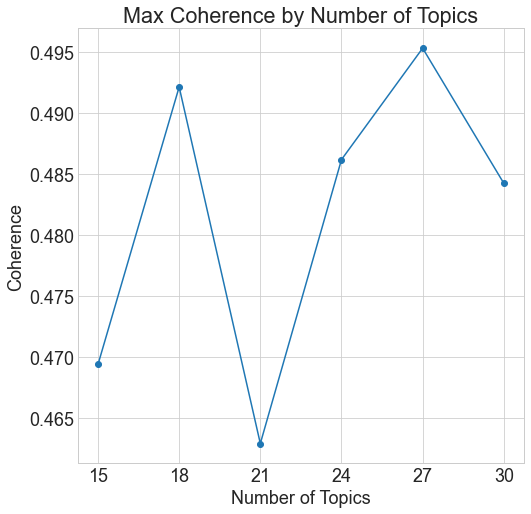

In [32]:
#Plot Coherence by Number of Topics

#matplotlib.rcParams.update({'font.size': 18})
plt.plot(max_coherence['Num_Topics'], max_coherence['Coherence'], marker='o')
plt.gcf().set_size_inches(8, 8)
xlabel = plt.xlabel("Number of Topics")
#xlabel.set_color("white")
#[i.set_color("white") for i in plt.gca().get_xticklabels()]

ylabel = plt.ylabel("Coherence")
#ylabel.set_color("white")
#[i.set_color("white") for i in plt.gca().get_yticklabels()]

plt.xticks(max_coherence['Num_Topics'])

#plt.title('Max Coherence by Number of Topics', c='white')
plt.title('Max Coherence by Number of Topics')




plt.show()

In [33]:
tuning_results.sort_values('Coherence',  ascending=False)

,Num_Topics,Alpha,Beta,Coherence
65,27,0.01,0.31,0.495317
17,18,0.01,0.31,0.492138
54,24,0.31,0.61,0.486187
49,24,0.01,0.31,0.485666
85,30,0.31,0.31,0.484246
69,27,0.31,0.31,0.476268
70,27,0.31,0.61,0.473718
81,30,0.01,0.31,0.470600
2,15,0.01,0.61,0.469399
6,15,0.31,0.61,0.465397


 **The highest coherence values were produced when k=18 and k=27,
 where k is number of topics produced by the model. 
 I will use the associated parameters with each of the k values to train 2 LDA models and see what the results are.**

### Lda Model: k=18

In [35]:
model_18 = LdaModel(corpus=corpus_BoW, id2word=review_id2word,
                                num_topics=18, passes=10, random_state = 100, alpha = 0.01, eta = 0.31)

C:\Users\ANDREA\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
model_18.save('model_18.pkl')

C:\Users\ANDREA\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Lda Model: k=27

In [39]:
model_27 = LdaModel(corpus=corpus_BoW, id2word=review_id2word,
                                num_topics=27, passes=10, random_state = 100, alpha = 0.01, eta = 0.31)

C:\Users\ANDREA\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
model_27.save('pickled/model_27.pkl')

C:\Users\ANDREA\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **More to come in Part 2**